In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_cars_all=pd.read_csv('cars.csv')

In [3]:
df_cars_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1103 non-null   int64 
 1   모델명         1103 non-null   object
 2   연식          1103 non-null   object
 3   주행거리        1103 non-null   object
 4   연료          1103 non-null   object
 5   배기량         1103 non-null   object
 6   변속기         1103 non-null   object
 7   연비          815 non-null    object
 8   최고출력        907 non-null    object
 9   최대토크        864 non-null    object
 10  차량중량        843 non-null    object
 11  구동방식        896 non-null    object
 12  보험처리        1103 non-null   int64 
 13  중고가격        1103 non-null   object
dtypes: int64(2), object(12)
memory usage: 120.8+ KB


In [4]:
df_cars = df_cars_all.dropna()
# 결측치가 있는 행 제거

In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 1102
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  798 non-null    int64 
 1   모델명         798 non-null    object
 2   연식          798 non-null    object
 3   주행거리        798 non-null    object
 4   연료          798 non-null    object
 5   배기량         798 non-null    object
 6   변속기         798 non-null    object
 7   연비          798 non-null    object
 8   최고출력        798 non-null    object
 9   최대토크        798 non-null    object
 10  차량중량        798 non-null    object
 11  구동방식        798 non-null    object
 12  보험처리        798 non-null    int64 
 13  중고가격        798 non-null    object
dtypes: int64(2), object(12)
memory usage: 93.5+ KB


In [6]:
df_cars.head()

,Unnamed: 0,모델명,연식,주행거리,연료,배기량,변속기,연비,최고출력,최대토크,차량중량,구동방식,보험처리,중고가격
0,0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,2021.11 (22년형),"37,983 km",가솔린 하이브리드,"2,359 cc (200마력)",자동,16.2km/ℓ,200마력,25.1kg.m,"1,675kg",전륜 FF,4,"3,700만원"
1,1,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,2017.09 (18년형),"60,000 km",가솔린 하이브리드,"2,359 cc (199마력)",자동,16.2km/ℓ,199마력,26.7kg.m,"1,675kg",전륜 FF,23,"2,050만원"
2,2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,2020.03,"43,818 km",가솔린 하이브리드,"2,359 cc (159마력)",자동,16.2km/ℓ,159마력,21kg.m,"1,675kg",전륜 FF,2,"3,469만원"
3,3,현대 그랜저IG 2.4 프리미엄,2018.01,"61,406 km",가솔린,"2,359 cc (190마력)",자동,11.2km/ℓ,190마력,24.6kg.m,"1,550kg",전륜 FF,0,"1,940만원"
4,4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,2018.10 (19년형),"56,098 km",가솔린 하이브리드,"2,359 cc (199마력)",자동,16.2km/ℓ,199마력,26.7kg.m,"1,675kg",전륜 FF,0,"2,800만원"


In [7]:
df_cars.columns

Index(['Unnamed: 0', '모델명', '연식', '주행거리', '연료', '배기량', '변속기', '연비', '최고출력',
       '최대토크', '차량중량', '구동방식', '보험처리', '중고가격'],
      dtype='object')

In [8]:
df_cars = df_cars.drop([df_cars.columns[0]],axis=1)
df_cars.columns

# 'Unnamed:0' 열 제거

Index(['모델명', '연식', '주행거리', '연료', '배기량', '변속기', '연비', '최고출력', '최대토크', '차량중량',
       '구동방식', '보험처리', '중고가격'],
      dtype='object')

In [9]:
idx1 = df_cars[df_cars['중고가격']=="0원"].index
idx2 = df_cars[df_cars['중고가격']=="[가격상담]"].index
idx3 = df_cars[df_cars['중고가격']=="[계약]"].index
idx4 = df_cars[df_cars['중고가격']=="10500000만원"].index

df_cars.drop(idx1, inplace=True)
df_cars.drop(idx2, inplace=True)
df_cars.drop(idx3, inplace=True)
df_cars.drop(idx4, inplace=True)

df_cars.drop_duplicates()

len(df_cars)

# 중고가격이 0원, 10500000만원, 가격상담, 계약이라고 명시되어있는 행 제거
# 중복 데이터 제거

774

In [10]:
df_cars['is_genesis'] = df_cars['모델명'].apply(lambda x: 1 if '제네시스' in x else 0)

# is_genesis 라는 새로운 열을 추가하여 모델명에 '제네시스'가 포함되면 1, 그렇지 않으면 0 을 출력

In [11]:
df_cars['연식']=df_cars['연식'].apply(lambda x:x[:4]+x[5:7])

# 연식을 yyyymmdd 형식으로 표현

In [12]:
df_cars['주행거리']=df_cars['주행거리'].apply(lambda x:x.replace(",","")[:-2].rstrip())

# 주행거리를 숫자로만 표현 12,345km -> 12345

In [13]:
def fuel_type(x):
    if x[:3] =='LPG':
        return 0
    elif x[:3] =='가솔린':
        return 1
    elif x[:2] == '디젤':
        return 2
    elif x[:2] == '전기':
        return 3
    else:
        return 4

df_cars['연료'] = df_cars['연료'].apply(fuel_type)

# 연료가 'LPG'이면 0, '가솔린'이면 1, '디젤'이면 2. '전기'이면 3, 나머지는 4로 매핑

In [14]:
def engine(str1):
    index=str1.find('cc')
    return str1[:index].replace(',','').rstrip()

df_cars['배기량']=df_cars['배기량'].apply(engine)

# 배기량 cc와 쉼표 제거 

In [15]:
df_cars['변속기'] = df_cars['변속기'].apply(lambda x: 1 if '자동' in x else 0)

# 변속기 자동이면 1 수동이면 0 반환

In [16]:
def ratio(string):
    dot_index = string.find('.')
    return string[:dot_index+2]

df_cars['연비'] = df_cars['연비'].apply(ratio)

# 연비 데이터를 km를 제거하고 소수점 아래 한자리 까지만 가져옴

In [17]:
def horse(string):
    horse_index = string.find('마력')
    return string[:horse_index]

df_cars['최고출력'] = df_cars['최고출력'].apply(horse)

# 최고출력 단위제거. 숫자만 표시 200마력 -> 200

In [18]:
def toque(string):
    toque_index = string.find('kg.m')
    return string[:toque_index]

df_cars['최대토크'] = df_cars['최대토크'].apply(toque)

# 최대토크 단위 제거

In [19]:
def weight(string):
    weight_index = string.find('kg')
    return string[:weight_index].replace(',','').rstrip()

df_cars['차량중량'] = df_cars['차량중량'].apply(weight)

# 차량중량 쉼표 제거. 단위 제거.

In [20]:
def wheel(x):
    if x == '4WD' or x == 'AWD':
        return 1
    else:
        return 0
    
df_cars['구동방식'] = df_cars['구동방식'].apply(wheel)

# 구동방식이 '4WD'나'AWD' 즉 사륜구동이면 1을, 전륜이나 후륜 즉 이륜구동이면 0을 출력한다.

In [21]:
def price(string):
    price_index = string.find('만원')
    return string[:price_index].replace(',','').rstrip()

df_cars['중고가격'] = df_cars['중고가격'].apply(price)

# 중고가격을 쉼표를 제거하고 단위 '만원'을 제거

In [22]:
df_cars.iloc[:, 1:] = df_cars.iloc[:, 1:].astype(float)

# 모델명을 제외한 모든 데이터에 대해 실수형으로 변환

In [23]:
df_cars.dtypes

모델명            object
연식            float64
주행거리          float64
연료            float64
배기량           float64
변속기           float64
연비            float64
최고출력          float64
최대토크          float64
차량중량          float64
구동방식          float64
보험처리          float64
중고가격          float64
is_genesis    float64
dtype: object

In [24]:
df_cars['연식'] = (202305 - df_cars['연식'])
df_cars['연식'] = df_cars['연식'].apply(lambda x: int(str(x)[:2]) if x >= 1000 else float(str(x)[:1]))

# 연식을 2023년5월기준으로 얼마나 오래되었는지 기록. ex) 202109 이면 2 ( 2023-2021) 형식으로 표현

In [25]:
df_cars.columns =['model','year','distance','fuel','volume','auto','efficiency','max_power','max_toque','weight','method','insurance','price','is_genesis']

# 각 열의 이름을 영어로 변환

df_cars = df_cars[['model','year','distance','fuel','volume','auto','efficiency','max_power','max_toque','weight','method','insurance','is_genesis','price']]

In [26]:
df_cars

,model,year,distance,fuel,volume,auto,efficiency,max_power,max_toque,weight,method,insurance,is_genesis,price
0,현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑,1.0,37983.0,1.0,2359.0,1.0,16.2,200.0,25.1,1675.0,0.0,4.0,0.0,3700.0
1,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,5.0,60000.0,1.0,2359.0,1.0,16.2,199.0,26.7,1675.0,0.0,23.0,0.0,2050.0
2,현대 더 뉴 그랜저 하이브리드 2.4 HEV 익스클루시브,3.0,43818.0,1.0,2359.0,1.0,16.2,159.0,21.0,1675.0,0.0,2.0,0.0,3469.0
3,현대 그랜저IG 2.4 프리미엄,5.0,61406.0,1.0,2359.0,1.0,11.2,190.0,24.6,1550.0,0.0,0.0,0.0,1940.0
4,현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브,4.0,56098.0,1.0,2359.0,1.0,16.2,199.0,26.7,1675.0,0.0,0.0,0.0,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,기아 K5 2.4 프레스티지,12.0,143667.0,1.0,2359.0,1.0,13.0,201.0,25.5,1470.0,0.0,4.0,0.0,630.0
1097,기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜,4.0,49500.0,1.0,1999.0,1.0,17.0,191.0,27.0,1600.0,0.0,3.0,0.0,2250.0
1098,기아 K5 2.0 프레스티지,12.0,161755.0,1.0,1998.0,1.0,13.0,165.0,20.2,1415.0,0.0,4.0,0.0,460.0
1099,기아 K5 하이브리드 2세대 2.0 HEV 프레스티지,6.0,83723.0,1.0,1999.0,1.0,17.5,191.0,27.0,1580.0,0.0,2.0,0.0,1690.0


In [27]:
df_cars.describe()

,year,distance,fuel,volume,auto,efficiency,max_power,max_toque,weight,method,insurance,is_genesis,price
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,6.529716,94412.043928,1.242894,2174.750646,0.989664,11.718992,185.246770,39.446072,1642.239018,0.049096,2.861757,0.063307,1768.169251
std,4.025279,66515.084751,0.655691,675.763105,0.101204,3.132282,57.474128,189.326050,360.335862,0.216207,3.223500,0.243673,1719.161230
min,1.000000,5.000000,0.000000,180.000000,0.000000,1.000000,64.000000,8.800000,20.000000,0.000000,0.000000,0.000000,40.000000
25%,3.000000,46250.000000,1.000000,1995.000000,1.000000,10.100000,160.000000,20.500000,1460.000000,0.000000,0.000000,0.000000,750.000000
50%,6.000000,81421.500000,1.000000,2199.000000,1.000000,11.600000,186.000000,28.600000,1630.000000,0.000000,2.000000,0.000000,1380.000000
75%,10.000000,132854.000000,2.000000,2497.000000,1.000000,13.500000,202.000000,41.000000,1868.500000,0.000000,4.000000,0.000000,2357.500000
max,22.000000,379111.000000,4.000000,5038.000000,1.000000,21.200000,430.000000,3750.000000,2435.000000,1.000000,23.000000,1.000000,25000.000000


In [31]:
numeric_col = ['year','distance','volume','efficiency','max_power','max_toque','weight','insurance','price']
df_cars[numeric_col].corr()

# 'year','distance','volume','efficiency','max_power','max_toque','weight','insurance','price' 의 9개의 수치형 변수에 대해서 상관관계 분석

,year,distance,volume,efficiency,max_power,max_toque,weight,insurance,price
year,1.000000,0.614468,0.127503,-0.106553,-0.059218,-0.072248,-0.017411,0.445230,-0.427626
distance,0.614468,1.000000,0.214695,-0.175699,0.034292,-0.059458,0.170728,0.415793,-0.373626
volume,0.127503,0.214695,1.000000,-0.237160,0.829864,-0.058969,0.533757,0.144896,0.054454
efficiency,-0.106553,-0.175699,-0.237160,1.000000,-0.173092,0.014851,-0.159142,-0.005774,-0.051872
max_power,-0.059218,0.034292,0.829864,-0.173092,1.000000,-0.059376,0.510302,0.063049,0.192752
max_toque,-0.072248,-0.059458,-0.058969,0.014851,-0.059376,1.000000,-0.034860,-0.027680,-0.004018
weight,-0.017411,0.170728,0.533757,-0.159142,0.510302,-0.034860,1.000000,0.010458,0.155501
insurance,0.445230,0.415793,0.144896,-0.005774,0.063049,-0.027680,0.010458,1.000000,-0.240464
price,-0.427626,-0.373626,0.054454,-0.051872,0.192752,-0.004018,0.155501,-0.240464,1.000000


In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cars[numeric_col].corr(), cmap='coolwarm', annot=True)

# heatmap 이용

<AxesSubplot:>

In [30]:
sns.pairplot(df_cars[numeric_col])
# 산점도 행렬

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_cars[numeric_col]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

# 다중공선성 측정

   VIF Factor    features
0    6.403478        year
1    5.714142    distance
2   44.628351      volume
3    8.632383  efficiency
4   41.947636   max_power
5    1.046931   max_toque
6   26.299429      weight
7    2.375323   insurance
8    2.668645       price


In [198]:
numeric_col2 = ['year','distance','efficiency','max_power','max_toque','insurance','price']

X = df_cars[numeric_col2]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

# 다중공선성을 줄이기 위해 numeric_col 에서 volume과 weight 열을 제거함

   VIF Factor    features
0    6.187143        year
1    5.142523    distance
2    6.761878  efficiency
3    8.301572   max_power
4    1.044178   max_toque
5    2.348343   insurance
6    2.498392       price


In [199]:
df_cars = df_cars.drop([df_cars.columns[4]],axis=1)

# volume 열 제거

df_cars = df_cars.drop([df_cars.columns[8]],axis=1)

# weight 열 제거

df_cars.columns

Index(['model', 'year', 'distance', 'fuel', 'auto', 'efficiency', 'max_power',
       'max_toque', 'method', 'insurance', 'is_genesis', 'price'],
      dtype='object')

In [200]:
Q1 = df_cars[numeric_col2].quantile(0.25)
Q3 = df_cars[numeric_col2].quantile(0.75)
IQR = Q3 - Q1
df_cars = df_cars[~((df_cars[numeric_col2] < (Q1 - 1.5 * IQR)) | (df_cars[numeric_col2] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_cars)

# 0.25 ~ 0.75 외 이상치 제거

                                 model  year  distance  fuel  auto  \
0         현대 더 뉴 그랜저 하이브리드 2.4 HEV 르블랑   1.0   37983.0   1.0   1.0   
2     현대 더 뉴 그랜저 하이브리드 2.4 HEV  익스클루시브   3.0   43818.0   1.0   1.0   
3                   현대 그랜저IG 2.4  프리미엄   5.0   61406.0   1.0   1.0   
4        현대 그랜저IG 하이브리드 2.4 HEV 익스클루시브   4.0   56098.0   1.0   1.0   
5                     현대 그랜저IG 2.4  모던   5.0   47882.0   1.0   1.0   
...                                ...   ...       ...   ...   ...   
1096                   기아 K5 2.4 프레스티지  12.0  143667.0   1.0   1.0   
1097  기아 K5 하이브리드 2세대 2.0 HEV 노블레스 스페셜   4.0   49500.0   1.0   1.0   
1098                   기아 K5 2.0 프레스티지  12.0  161755.0   1.0   1.0   
1099     기아 K5 하이브리드 2세대 2.0 HEV 프레스티지   6.0   83723.0   1.0   1.0   
1102              기아 K5 2세대 2.0 MX 럭셔리   7.0   75235.0   1.0   1.0   

      efficiency  max_power  max_toque  method  insurance  is_genesis   price  
0           16.2      200.0       25.1     0.0        4.0         0.0  3700.0  

In [201]:
df_cars.describe()

# 이상치 제거 후 데이터 774개에서 527개로 줄음

,year,distance,fuel,auto,efficiency,max_power,max_toque,method,insurance,is_genesis,price
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,6.432638,93577.305503,1.277040,0.988615,12.180266,184.290323,31.214991,0.043643,2.540797,0.018975,1614.151803
std,3.871353,52937.006528,0.699745,0.106193,2.269392,29.466053,10.286093,0.204494,2.522474,0.136567,1014.137330
min,1.000000,5.000000,0.000000,0.000000,7.300000,106.000000,14.000000,0.000000,0.000000,0.000000,40.000000
25%,3.000000,49750.000000,1.000000,1.000000,10.600000,168.000000,24.600000,0.000000,0.000000,0.000000,799.000000
50%,5.000000,85800.000000,1.000000,1.000000,11.900000,190.000000,27.000000,0.000000,2.000000,0.000000,1390.000000
75%,9.000000,131889.500000,2.000000,1.000000,13.700000,202.000000,41.000000,0.000000,4.000000,0.000000,2350.000000
max,20.000000,255056.000000,4.000000,1.000000,17.800000,262.000000,46.000000,1.000000,10.000000,1.000000,4690.000000


<AxesSubplot:>

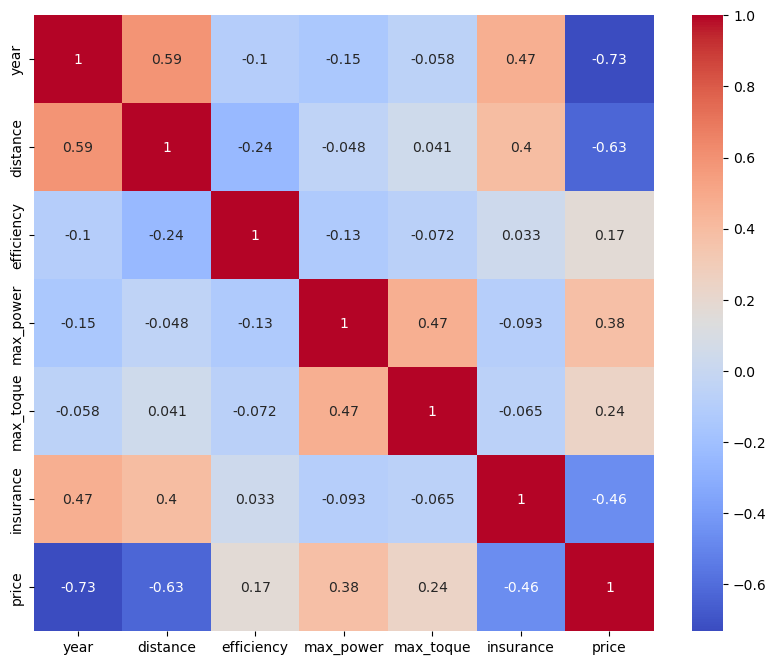

In [205]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cars[numeric_col2].corr(), cmap='coolwarm', annot=True)

In [206]:
df_cars.to_csv('C:/Users/PC/Documents/new_data.csv')

In [ ]:
# fuel, auto, method, is_genesis 와 같이 명목형 데이터를 수치형으로 매핑한 변수들은 후에 데이터 해석할 때 사용